In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [2]:
lead_levels = pd.read_csv("lead_census_tracts_cuyahoga.csv", skiprows=3)    # lead level data
map_df = gpd.read_file("tl_2015_39_tract.shp")
tract_ids = lead_levels.iloc[:,1]*100

In [3]:
lead_levels['lead_pct'] = lead_levels['lead_pct'].map(lambda x: max(0, x))

In [4]:
# converts tract number to 6-character FIPS string
def format_geoid(g):
    if len(g)==4:
        return '00'+g[:-2]
    elif len(g)==5:
        return '0'+g[:-1]
    else:
        return g

In [5]:
geoids = []
for i in tract_ids:
    # print(format_geoid(str(int(i))))
    geoids.append('39035'+format_geoid(str(int(i))))    # 39035 is the FIPS ID for Cuyahoga County, OH

lead_levels['GEOID'] = geoids

In [6]:
map_df = map_df[map_df['GEOID'].isin(geoids)]   # select only the tracts that are in the lead level dataset
map_df = map_df.merge(lead_levels, on='GEOID')

In [29]:
holc_nb = gpd.read_file('holc_redlines/HOLC_Cleveland.shp')
redlined = holc_nb.loc[(holc_nb['holc_grade']=='D')]

In [30]:
# from matplotlib.patches import Rectangle
# plt.figure()
# ax = map_df.plot(column='lead_pct', figsize=(10, 8), legend=True)
# rect = Rectangle((-81.8,41.4), 0.3, 0.2, fill=False, color='red', lw=2)
# ax.add_patch(rect)
# plt.title('Percent of children under 6 with elevated blood lead levels')

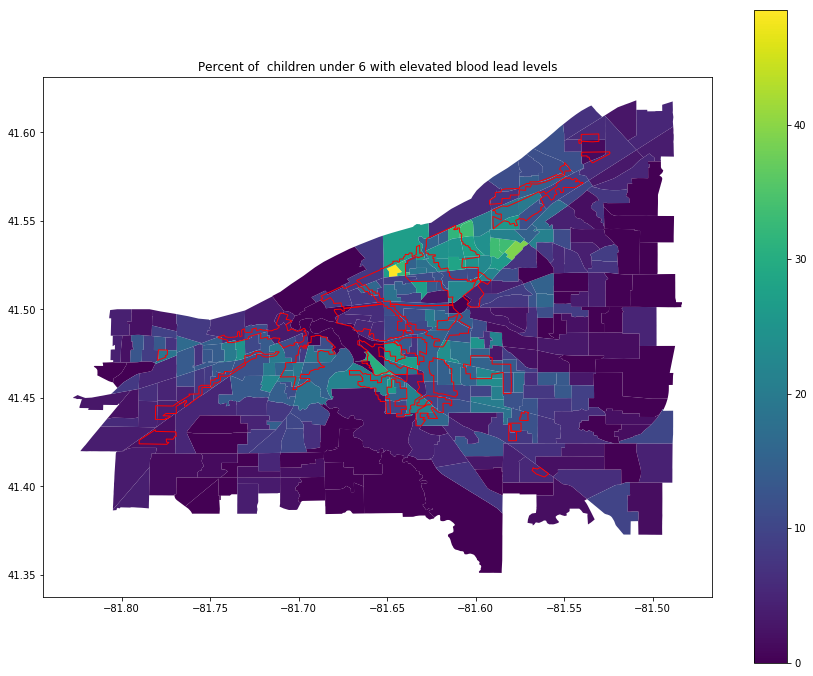

In [33]:
map_df_boxed = map_df.cx[-81.8:-81.5, 41.4:41.6]  # approximate Cleveland bounding box
ax = map_df_boxed.plot(column='lead_pct', figsize=(15, 12), legend=True)
redlined = redlined.to_crs(map_df_boxed.crs)
redlined = redlined.cx[-81.8:-81.5, 41.4:41.6]
redlined.plot(ax=ax, facecolor='none', edgecolor='red')
plt.title('Percent of  children under 6 with elevated blood lead levels')
plt.show()

Regions outlined in red were given a grade of D, or "hazardous", by the Home Owners' Loan Corporation between 1930 and 1940.

Robert K. Nelson, LaDale Winling, Richard Marciano, Nathan Connolly, et al., “Mapping Inequality,” American Panorama, ed. Robert K. Nelson and Edward L. Ayers, accessed March 16, 2019, https://dsl.richmond.edu/panorama/redlining/#loc=12/41.5002/-81.6451&opacity=0.8&city=cleveland-oh&text=bibliograph.
